In [22]:
import matplotlib.pyplot  as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [23]:
df = pd.read_csv('DataET.csv',delimiter=';',decimal=',')

In [24]:
df.describe()

,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],min_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],Somme_Precipitation[mm],moy_WindSpeed[m/s],max_WindSpeed[m/s],max_WindSpeedMax[m/s],moy_WindDirection[deg],dernier_WindDirection[deg],ETP quotidien [mm]
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1779.000000,1779.000000,1678.000000,2.000000,2.000000,1775.000000
mean,16.939517,25.120180,9.761179,9.210387,5.344189,197.886581,0.960253,0.153195,67.806232,91.373459,37.227434,0.998877,0.732546,2.322147,5.263349,263.500000,263.500000,3.022535
std,6.566283,7.797027,5.659706,4.369451,5.031990,82.742076,0.861440,0.306527,18.004065,13.681167,17.878867,3.328002,0.344445,0.746257,1.893481,50.204581,50.204581,1.643411
min,3.110000,5.640000,-3.980000,-5.700000,-14.700000,0.000000,0.000000,0.000000,15.570000,32.730000,3.340000,0.000000,0.000000,0.000000,1.400000,228.000000,228.000000,0.500000
25%,11.620000,18.720000,5.240000,6.400000,1.900000,131.000000,0.310000,0.000000,55.730000,88.360000,23.960000,0.000000,0.500000,1.800000,4.100000,245.750000,245.750000,1.450000
50%,16.170000,24.490000,9.400000,9.400000,5.500000,194.000000,0.700000,0.010000,70.070000,99.210000,34.850000,0.000000,0.700000,2.200000,4.900000,263.500000,263.500000,2.800000
75%,22.150000,31.170000,14.020000,12.600000,9.100000,271.000000,1.360000,0.150000,82.150000,99.340000,48.180000,0.200000,0.800000,2.600000,5.900000,281.250000,281.250000,4.550000
max,35.140000,47.340000,27.850000,20.800000,19.900000,361.000000,5.120000,2.480000,99.470000,99.780000,99.400000,40.200000,3.600000,7.700000,22.100000,299.000000,299.000000,8.000000


In [25]:
df.isna().sum()

Date/heure                       0
moy_Temp[°C]                     0
max_Temp[°C]                     0
min_Temp[°C]                     0
moy_DewPoint[°C]                 0
min_DewPoint[°C]                 0
moy_SolarRadiation[W/m2]         0
moy_VPD[kPa]                     0
min_VPD[kPa]                     0
moy_RelativeHumidity[%]          0
max_RelativeHumidity[%]          0
min_RelativeHumidity[%]          0
Somme_Precipitation[mm]          0
moy_WindSpeed[m/s]               2
max_WindSpeed[m/s]               2
max_WindSpeedMax[m/s]          103
moy_WindDirection[deg]        1779
dernier_WindDirection[deg]    1779
ETP quotidien [mm]               6
dtype: int64

In [26]:
df_mean = df.fillna(df.mean())

/var/folders/jm/1tc0dml95rn_rk696_b2vqc80000gn/T/ipykernel_7544/3802254522.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean = df.fillna(df.mean())


In [27]:
df_median = df.fillna(df.median())

/var/folders/jm/1tc0dml95rn_rk696_b2vqc80000gn/T/ipykernel_7544/3484784094.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_median = df.fillna(df.median())


In [28]:
df_mean

,Date/heure,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],min_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],Somme_Precipitation[mm],moy_WindSpeed[m/s],max_WindSpeed[m/s],max_WindSpeedMax[m/s],moy_WindDirection[deg],dernier_WindDirection[deg],ETP quotidien [mm]
0,5/8/22 0:00,24.73,35.08,15.11,12.4,8.8,361,1.90,0.30,51.87,83.30,22.00,0.0,0.500000,2.100000,4.400000,263.5,263.5,3.022535
1,4/8/22 0:00,25.26,35.79,16.40,14.6,8.0,288,1.73,0.00,59.06,99.54,19.84,0.0,0.600000,1.700000,5.300000,263.5,263.5,5.000000
2,3/8/22 0:00,28.37,36.71,19.80,12.3,7.4,285,2.56,0.95,38.43,65.76,23.60,0.0,0.700000,2.600000,5.300000,263.5,263.5,5.300000
3,2/8/22 0:00,32.17,43.43,19.68,0.9,-4.7,296,4.55,1.70,16.44,38.56,5.23,0.0,0.600000,2.300000,6.600000,263.5,263.5,5.300000
4,1/8/22 0:00,32.30,41.90,21.26,8.7,1.5,290,3.97,1.39,26.68,47.56,9.52,0.0,0.600000,2.700000,6.700000,263.5,263.5,5.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,4/9/17 0:00,26.19,27.22,25.43,19.0,17.9,0,1.18,1.04,65.12,68.01,57.11,5.4,0.000000,0.500000,5.263349,263.5,263.5,0.600000
1777,6/6/17 0:00,26.21,26.42,25.51,17.4,17.2,0,1.40,1.28,58.50,60.93,57.18,0.0,0.000000,0.000000,5.263349,299.0,299.0,3.022535
1778,5/6/17 0:00,26.31,26.47,26.10,16.0,15.3,0,1.58,1.48,53.43,56.89,51.64,0.0,0.000000,0.000000,5.263349,228.0,228.0,3.022535
1779,10/4/17 0:00,23.58,23.92,22.89,14.9,14.1,2,1.20,1.13,58.56,61.86,56.71,0.0,0.732546,2.322147,5.263349,263.5,263.5,3.022535


In [29]:
df_median

,Date/heure,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],min_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],Somme_Precipitation[mm],moy_WindSpeed[m/s],max_WindSpeed[m/s],max_WindSpeedMax[m/s],moy_WindDirection[deg],dernier_WindDirection[deg],ETP quotidien [mm]
0,5/8/22 0:00,24.73,35.08,15.11,12.4,8.8,361,1.90,0.30,51.87,83.30,22.00,0.0,0.5,2.1,4.4,263.5,263.5,2.8
1,4/8/22 0:00,25.26,35.79,16.40,14.6,8.0,288,1.73,0.00,59.06,99.54,19.84,0.0,0.6,1.7,5.3,263.5,263.5,5.0
2,3/8/22 0:00,28.37,36.71,19.80,12.3,7.4,285,2.56,0.95,38.43,65.76,23.60,0.0,0.7,2.6,5.3,263.5,263.5,5.3
3,2/8/22 0:00,32.17,43.43,19.68,0.9,-4.7,296,4.55,1.70,16.44,38.56,5.23,0.0,0.6,2.3,6.6,263.5,263.5,5.3
4,1/8/22 0:00,32.30,41.90,21.26,8.7,1.5,290,3.97,1.39,26.68,47.56,9.52,0.0,0.6,2.7,6.7,263.5,263.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,4/9/17 0:00,26.19,27.22,25.43,19.0,17.9,0,1.18,1.04,65.12,68.01,57.11,5.4,0.0,0.5,4.9,263.5,263.5,0.6
1777,6/6/17 0:00,26.21,26.42,25.51,17.4,17.2,0,1.40,1.28,58.50,60.93,57.18,0.0,0.0,0.0,4.9,299.0,299.0,2.8
1778,5/6/17 0:00,26.31,26.47,26.10,16.0,15.3,0,1.58,1.48,53.43,56.89,51.64,0.0,0.0,0.0,4.9,228.0,228.0,2.8
1779,10/4/17 0:00,23.58,23.92,22.89,14.9,14.1,2,1.20,1.13,58.56,61.86,56.71,0.0,0.7,2.2,4.9,263.5,263.5,2.8


In [30]:
df.dtypes

Date/heure                     object
moy_Temp[°C]                  float64
max_Temp[°C]                  float64
min_Temp[°C]                  float64
moy_DewPoint[°C]              float64
min_DewPoint[°C]              float64
moy_SolarRadiation[W/m2]        int64
moy_VPD[kPa]                  float64
min_VPD[kPa]                  float64
moy_RelativeHumidity[%]       float64
max_RelativeHumidity[%]       float64
min_RelativeHumidity[%]       float64
Somme_Precipitation[mm]       float64
moy_WindSpeed[m/s]            float64
max_WindSpeed[m/s]            float64
max_WindSpeedMax[m/s]         float64
moy_WindDirection[deg]        float64
dernier_WindDirection[deg]    float64
ETP quotidien [mm]            float64
dtype: object

In [31]:
df_mean=df_mean.drop('Date/heure',axis=1)

In [32]:
df_mean.dtypes

moy_Temp[°C]                  float64
max_Temp[°C]                  float64
min_Temp[°C]                  float64
moy_DewPoint[°C]              float64
min_DewPoint[°C]              float64
moy_SolarRadiation[W/m2]        int64
moy_VPD[kPa]                  float64
min_VPD[kPa]                  float64
moy_RelativeHumidity[%]       float64
max_RelativeHumidity[%]       float64
min_RelativeHumidity[%]       float64
Somme_Precipitation[mm]       float64
moy_WindSpeed[m/s]            float64
max_WindSpeed[m/s]            float64
max_WindSpeedMax[m/s]         float64
moy_WindDirection[deg]        float64
dernier_WindDirection[deg]    float64
ETP quotidien [mm]            float64
dtype: object

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
features_mean = df_mean.drop('ETP quotidien [mm]',axis=1)
target_mean = df_mean['ETP quotidien [mm]']

In [35]:
features_mean

,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],min_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],Somme_Precipitation[mm],moy_WindSpeed[m/s],max_WindSpeed[m/s],max_WindSpeedMax[m/s],moy_WindDirection[deg],dernier_WindDirection[deg]
0,24.73,35.08,15.11,12.4,8.8,361,1.90,0.30,51.87,83.30,22.00,0.0,0.500000,2.100000,4.400000,263.5,263.5
1,25.26,35.79,16.40,14.6,8.0,288,1.73,0.00,59.06,99.54,19.84,0.0,0.600000,1.700000,5.300000,263.5,263.5
2,28.37,36.71,19.80,12.3,7.4,285,2.56,0.95,38.43,65.76,23.60,0.0,0.700000,2.600000,5.300000,263.5,263.5
3,32.17,43.43,19.68,0.9,-4.7,296,4.55,1.70,16.44,38.56,5.23,0.0,0.600000,2.300000,6.600000,263.5,263.5
4,32.30,41.90,21.26,8.7,1.5,290,3.97,1.39,26.68,47.56,9.52,0.0,0.600000,2.700000,6.700000,263.5,263.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,26.19,27.22,25.43,19.0,17.9,0,1.18,1.04,65.12,68.01,57.11,5.4,0.000000,0.500000,5.263349,263.5,263.5
1777,26.21,26.42,25.51,17.4,17.2,0,1.40,1.28,58.50,60.93,57.18,0.0,0.000000,0.000000,5.263349,299.0,299.0
1778,26.31,26.47,26.10,16.0,15.3,0,1.58,1.48,53.43,56.89,51.64,0.0,0.000000,0.000000,5.263349,228.0,228.0
1779,23.58,23.92,22.89,14.9,14.1,2,1.20,1.13,58.56,61.86,56.71,0.0,0.732546,2.322147,5.263349,263.5,263.5


In [36]:
target_mean

0       3.022535
1       5.000000
2       5.300000
3       5.300000
4       5.500000
          ...   
1776    0.600000
1777    3.022535
1778    3.022535
1779    3.022535
1780    3.022535
Name: ETP quotidien [mm], Length: 1781, dtype: float64

In [37]:
x = features_mean
y = target_mean
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

x_train,x_test,y_train,y_test = train_test_split(x, y_transformed, test_size=0.2)
x_train.shape

(1424, 17)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rand_forest_model = RandomForestRegressor(n_estimators=100, max_features="auto", random_state=42)

In [40]:
rand_forest_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [41]:
predictions = rand_forest_model.predict(x_test)
predictions


array([ 8.29,  9.27, 10.85, 23.95, 14.26, 15.63,  2.17,  5.69, 29.34,
       13.63, 43.46, 46.51, 22.39, 22.56, 46.46, 46.03, 44.01, 46.35,
       43.57,  6.  , 42.68, 12.96,  8.79,  5.92, 15.48, 24.58,  6.41,
       10.41, 45.65, 22.13, 29.06, 21.5 , 51.61, 11.98, 32.69, 39.03,
       56.5 , 42.74, 45.74,  5.2 , 14.34, 20.55, 17.51, 36.31, 30.45,
       28.94,  9.32, 54.77, 39.95, 45.94, 30.35,  7.98, 39.88, 13.97,
       38.17, 11.51, 54.02, 43.89, 10.5 , 17.39, 17.77, 19.33, 34.5 ,
       41.02,  6.05,  6.32, 15.  ,  7.22, 18.01, 34.72, 30.46,  5.83,
       47.4 , 44.85, 54.89, 50.22, 14.83, 31.56,  1.79, 45.8 , 21.85,
       17.51, 10.89, 41.4 ,  9.88, 51.15, 21.2 , 44.99,  7.31, 30.47,
       18.78, 51.14, 45.16, 30.92,  4.93, 52.76, 51.77,  9.48,  8.18,
       30.25,  7.81,  8.69,  7.07, 43.92,  8.39, 19.78, 15.09, 14.64,
       29.54,  5.09, 48.03, 50.97, 43.85, 30.15,  9.8 , 35.83, 10.25,
        5.54, 47.  ,  6.8 , 47.28,  8.46,  6.17, 37.58, 35.81, 54.75,
       25.29, 22.58,

In [42]:
rand_forest_model.score(x_test,y_test)

0.9802784727107675

In [43]:
from sklearn import tree
dtc_model = tree.DecisionTreeRegressor(max_depth=1100,random_state=42)

In [44]:
dtc_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=1100, random_state=42)

In [45]:
predictions_dtc = dtc_model.predict(x_test)
x_test

,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],min_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],Somme_Precipitation[mm],moy_WindSpeed[m/s],max_WindSpeed[m/s],max_WindSpeedMax[m/s],moy_WindDirection[deg],dernier_WindDirection[deg]
938,13.84,26.89,6.20,7.6,4.3,105,0.64,0.00,71.28,99.21,24.37,0.0,0.4,2.0,3.700000,263.5,263.5
266,10.91,20.05,2.85,5.4,2.6,151,0.48,0.00,73.39,99.23,35.62,0.0,0.3,1.6,8.100000,263.5,263.5
1703,13.01,24.61,3.74,-3.6,-5.5,146,1.19,0.37,34.35,54.10,15.74,0.0,0.4,1.8,5.263349,263.5,263.5
1598,12.89,17.91,9.41,8.1,6.1,185,0.41,0.14,73.68,89.62,47.40,1.2,1.9,4.7,11.800000,263.5,263.5
168,10.46,18.33,1.85,4.4,-1.4,180,0.48,0.00,69.86,99.34,30.82,0.0,0.7,2.4,5.000000,263.5,263.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,19.07,27.63,13.05,8.6,-2.9,324,1.13,0.01,60.97,99.20,13.91,0.0,0.6,1.8,3.900000,263.5,263.5
1030,20.63,29.97,12.45,12.9,9.9,214,1.07,0.02,65.40,98.15,37.46,0.0,0.6,1.9,5.600000,263.5,263.5
267,12.12,21.58,3.12,2.6,0.0,154,0.76,0.10,57.02,87.44,24.32,0.0,0.4,1.3,4.400000,263.5,263.5
546,8.26,17.12,0.97,2.7,-0.4,150,0.40,0.00,72.61,99.24,34.69,0.0,0.5,1.7,3.800000,263.5,263.5


In [46]:
predictions_dtc

array([ 5.,  7., 12., 27., 13., 17.,  2.,  3., 29., 15., 43., 46., 24.,
       31., 50., 48., 43., 47., 43.,  7., 43., 11.,  6.,  4., 17., 21.,
        5., 11., 46., 21., 29., 19., 52., 19., 35., 40., 55., 45., 46.,
        4., 14., 19., 17., 39., 34., 36.,  9., 54., 42., 47., 28.,  7.,
       39., 12., 39., 12., 55., 43., 11., 15., 19., 18., 42., 43.,  5.,
        6., 19., 11., 26., 37., 27.,  6., 50., 44., 50., 51., 14., 30.,
        1., 46., 20., 17.,  8., 40., 12., 50., 19., 47.,  8., 29., 22.,
       51., 48., 30.,  4., 50., 56., 14.,  8., 29.,  8.,  9.,  7., 43.,
        7., 25., 17., 17., 27.,  3., 48., 52., 44., 30.,  5., 38., 16.,
        5., 47.,  7., 48.,  9.,  6., 39., 35., 57., 22., 23., 10.,  7.,
       10., 28., 16., 50., 44., 46., 20.,  9., 65., 35.,  2.,  4., 27.,
       52.,  3.,  9., 47.,  9.,  5., 13., 16., 32.,  2., 39., 48., 35.,
        6., 12., 19.,  9., 39., 11., 14., 15., 28., 21., 42.,  6., 17.,
        4.,  2., 14., 49.,  7., 19.,  6.,  2., 52., 16.,  5., 19

In [47]:
dtc_model.score(x_test,y_test)

0.962949765146955

In [48]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [49]:
predictions_svr = svr_model.predict(x_test)

In [50]:
svr_model.score(x_test,y_test)

0.9047474203670726

In [51]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [52]:
knn_model.fit(x_train,y_train) 

KNeighborsRegressor(n_neighbors=3)

In [53]:
predictions_knn = knn_model.predict(x_test)

In [54]:
predictions_knn

array([11.        ,  9.        , 12.66666667, 22.33333333, 15.        ,
       15.66666667,  2.33333333,  7.33333333, 28.33333333, 14.33333333,
       44.66666667, 46.33333333, 19.66666667, 27.        , 46.        ,
       43.66666667, 45.66666667, 37.66666667, 45.        ,  7.        ,
       42.        , 12.33333333,  6.33333333,  4.66666667, 16.33333333,
       24.66666667,  6.66666667,  8.        , 45.66666667, 25.        ,
       24.66666667, 17.33333333, 49.33333333, 10.33333333, 36.66666667,
       38.66666667, 52.66666667, 45.33333333, 46.33333333,  6.33333333,
       13.66666667, 18.66666667, 22.33333333, 39.        , 28.        ,
       33.33333333,  8.33333333, 58.        , 40.66666667, 47.        ,
       29.33333333,  9.        , 40.        , 15.        , 37.66666667,
       13.66666667, 50.33333333, 43.66666667, 10.        , 16.66666667,
       16.33333333, 19.66666667, 31.        , 42.66666667,  6.33333333,
        6.33333333, 15.66666667,  5.33333333, 10.33333333, 31.  

In [55]:
knn_model.score(x_test,y_test)

0.9506482223614018

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score, r2_score
r2 = []
evs = []
mape = []
mse = []
r2.append(r2_score(y_test,predictions))
r2_score(y_test,predictions)

0.9802784727107675

In [57]:
evs.append(explained_variance_score(y_test,predictions))
explained_variance_score(y_test,predictions)

0.9804340220535444

In [58]:
mape.append(mean_absolute_percentage_error(y_test,predictions))
mean_absolute_percentage_error(y_test,predictions)

0.1108765252398609

In [59]:
mse.append(np.sqrt(mean_squared_error(y_test,predictions)))
np.sqrt(mean_squared_error(y_test,predictions))

2.358910694338712

In [60]:
err_rf = 1 - rand_forest_model.score(x_test,y_test)
err_rf

0.019721527289232488

In [61]:
errs_rf = []
for i in range(10,101,10):
    rf = RandomForestRegressor(n_estimators=i, max_features="auto", random_state=42).fit(x_train,y_train)
    err = 1 - rf.score(x_test,y_test)
    errs_rf.append(err)
errs_rf

[0.019753970071246574,
 0.021264198997139383,
 0.020948825805223503,
 0.020151866710183652,
 0.020213686843807865,
 0.020278630540126463,
 0.02024932661365364,
 0.01994271921407731,
 0.019979037513538578,
 0.019721527289232488]

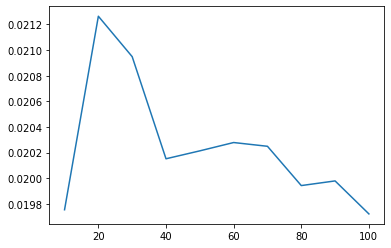

In [62]:
plt.plot(np.array(range(10,101,10)),errs_rf)
plt.show()

In [63]:
r2.append(r2_score(y_test,predictions_dtc))
r2_score(y_test,predictions_dtc)

0.962949765146955

In [64]:
evs.append(explained_variance_score(y_test,predictions_dtc))
explained_variance_score(y_test,predictions_dtc)

0.9629782412837576

In [65]:
mape.append(mean_absolute_percentage_error(y_test,predictions_dtc))
mean_absolute_percentage_error(y_test,predictions_dtc)

0.1494202883610627

In [66]:
mse.append(np.sqrt(mean_squared_error(y_test,predictions_dtc)))
np.sqrt(mean_squared_error(y_test,predictions_dtc))

3.2332308164752237

In [67]:
dtc_err = 1 - dtc_model.score(x_test,y_test)
dtc_err

0.03705023485304504

In [68]:
errs_dtc = []
for i in range(44):
    dtc = tree.DecisionTreeRegressor(max_depth=1100,random_state=i)
    dtc.fit(x_train,y_train)
    err = 1 - dtc.score(x_test,y_test)
    errs_dtc.append(err)
errs_dtc

[0.03414141416388583,
 0.036782186530153305,
 0.04158720091088042,
 0.03696088541208109,
 0.0352136074554531,
 0.036672981657864034,
 0.038092644997624325,
 0.03664319851087605,
 0.037427488048226154,
 0.03686160825545448,
 0.035769559532562,
 0.0362758730313576,
 0.0410610319807595,
 0.03533274004340492,
 0.037010523990394395,
 0.041567345479555096,
 0.03617659587473099,
 0.0382514884482269,
 0.041775827508470975,
 0.03812242814461231,
 0.038181994438588274,
 0.04277852679039951,
 0.037536692920515424,
 0.03937332031810736,
 0.04193467095907355,
 0.037874235253045785,
 0.03926411544581809,
 0.03698074084340641,
 0.034945559132561255,
 0.039601657778348565,
 0.04073341736389169,
 0.038628741643407905,
 0.03790401840003377,
 0.03882729595666112,
 0.03768560865545523,
 0.036236162168706954,
 0.037000596274731734,
 0.038638669359070565,
 0.038628741643407905,
 0.036454571913285494,
 0.04400956353256935,
 0.040455441325337294,
 0.03705023485304504,
 0.03877765737834782]

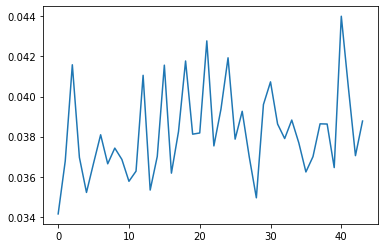

In [69]:
plt.plot(np.array(range(44)),errs_dtc)
plt.show()

In [70]:
r2.append(r2_score(y_test,predictions_svr))
r2_score(y_test,predictions_svr)

0.9047474203670726

In [71]:
evs.append(explained_variance_score(y_test,predictions_svr))
explained_variance_score(y_test,predictions_svr)

0.9047675801708351

In [72]:
mape.append(mean_absolute_percentage_error(y_test,predictions_svr))
mean_absolute_percentage_error(y_test,predictions_svr)

0.24249699931279178

In [73]:
mse.append(np.sqrt(mean_squared_error(y_test,predictions_svr)))
np.sqrt(mean_squared_error(y_test,predictions_svr))

5.184174361465055

In [74]:
err_svr = 1 - svr_model.score(x_test,y_test)
err_svr

0.09525257963292744

In [75]:
r2.append(r2_score(y_test,predictions_knn))
r2_score(y_test,predictions_knn)

0.9506482223614018

In [76]:
evs.append(explained_variance_score(y_test,predictions_knn))
explained_variance_score(y_test,predictions_knn)

0.9513424394308769

In [77]:
mape.append(mean_absolute_percentage_error(y_test,predictions_knn))
mean_absolute_percentage_error(y_test,predictions_knn)

0.14909160685487896

In [78]:
mse.append(np.sqrt(mean_squared_error(y_test,predictions_knn)))
np.sqrt(mean_squared_error(y_test,predictions_knn))

3.7315788861425014

In [79]:
err_knn = 1 - knn_model.score(x_test,y_test)
err_knn

0.049351777638598215

In [80]:
errs_knn = []
for i in range(3,30):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x_train,y_train)
        errs_knn.append(1-knn.score(x_test,y_test))
errs_knn

[0.049351777638598215,
 0.04884622250697124,
 0.051386650487178276,
 0.053115484954264214,
 0.05272103272333195,
 0.05347470969357171,
 0.0549137496975054,
 0.056236935251327225,
 0.05641018291483668,
 0.05632992761239963,
 0.05716784011328968,
 0.0573675075631197,
 0.057449616750316235,
 0.05771873057908006,
 0.05790269738733633,
 0.058469281395232775,
 0.0584250191837119,
 0.05909854965251049,
 0.059402768065359046,
 0.059479098274960895,
 0.05985907713673766,
 0.060383555249526655,
 0.060962241988542054,
 0.061275329666925615,
 0.06105364009602343,
 0.0615207243567244,
 0.06178045788047282]

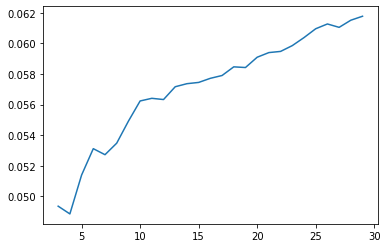

In [81]:
plt.plot(np.array(range(3,30)),errs_knn)
plt.show()

In [82]:
scores = [rand_forest_model.score(x_test,y_test),dtc_model.score(x_test,y_test),svr_model.score(x_test,y_test),knn_model.score(x_test,y_test)]

In [83]:
scores

[0.9802784727107675, 0.962949765146955, 0.9047474203670726, 0.9506482223614018]

In [84]:
mod=['RF','DT','SVR','KNN']

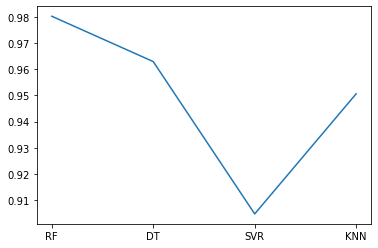

In [85]:
plt.plot(mod,scores,label="scores")
plt.show()

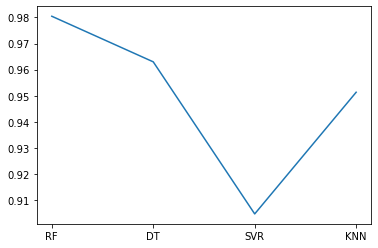

In [86]:
plt.plot(mod,evs,label='evs')
plt.show()

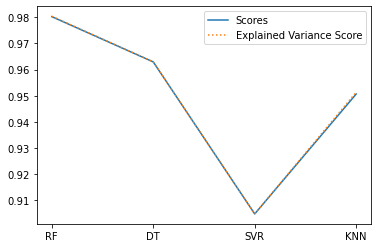

In [87]:
plt.plot(mod,scores,label="Scores")
plt.plot(mod,evs,linestyle='dotted',label='Explained Variance Score')
plt.legend()
plt.show()

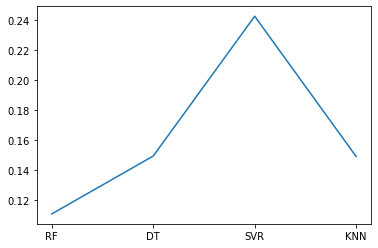

In [88]:
plt.plot(mod,mape)
plt.show()

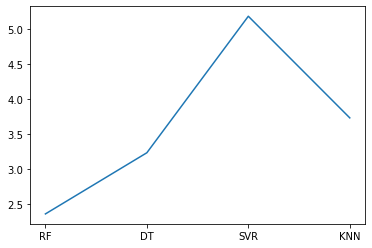

In [89]:
plt.plot(mod,mse)
plt.show()

In [90]:
mod[scores.index(max(scores))]

'RF'

In [91]:
mod[evs.index(max(evs))]

'RF'

In [92]:
mod[mape.index(min(mape))]

'RF'

In [93]:
mod[mse.index(min(mse))]

'RF'